In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('train.csv')

In [3]:
df = train

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [5]:
# Split the data into train and test sets
X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=64)

y_train =  y_train.astype(int)
y_test = y_test.astype(int)





In [6]:
beta = LogisticRegression(random_state=65)
beta.fit(X_train,y_train)
beta.intercept_,beta.coef_

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([-7.78935026e-05,  5.81036428e-05,  8.36595770e-05, -1.20176710e-04,
         1.83122933e-05,  4.55868652e-04, -4.46102414e-05,  1.64913061e-04,
        -4.55065671e-04, -8.31111003e-05]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [7]:
y_pred = beta.predict(X_train)

accuracy_score(y_train, y_pred) #0.943 (no StandardScaler) 0.960 (StandardScaler) 0.962 (StandardScaler 1000) 0.960 (1000)


0.9431414356787491

In [8]:
y_pred = beta.predict(X_test)

accuracy_score(y_test, y_pred) #0.915 (no StandardScaler) 0.905 (StandardScaler) 0.903 (StandardScaler 1000) 0.893 (1000)


0.9128427128427128

In [9]:
from sklearn.metrics import confusion_matrix



# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9
0,1334,0,3,2,3,12,18,5,10,1
1,0,1424,6,4,1,4,1,5,15,1
2,6,18,1199,33,15,12,15,8,42,3
3,5,11,42,1229,0,56,11,7,27,12
4,4,4,4,3,1260,1,15,3,11,52
5,16,7,13,40,12,1117,19,4,49,17
6,6,7,18,2,17,22,1335,2,5,0
7,4,8,25,12,9,1,1,1308,7,56
8,10,40,18,30,3,40,13,5,1182,16
9,9,2,3,22,42,9,0,47,9,1264


<Axes: >

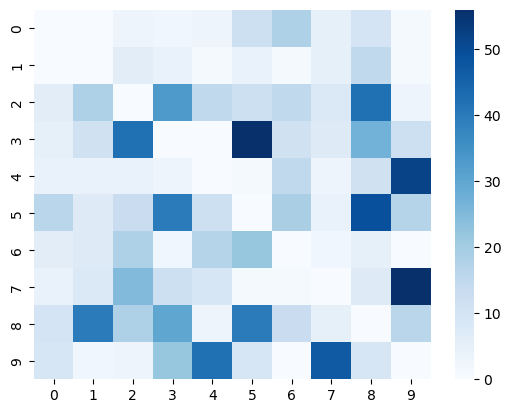

In [10]:
import seaborn as sns
# Function to replace values greater than 100 with 0
def replace_values(x):
    if x > 100:
        return 0
    else:
        return x

# Apply the function to each cell in the DataFrame
cm = cm.applymap(replace_values)
sns.heatmap(cm,cmap="Blues")

In [11]:
X = df.drop(columns=['label'])
y = df['label']

In [12]:
y_train =  y_train.astype(int)
y_test = y_test.astype(int)

In [13]:
beta = LogisticRegression(random_state=65)
beta.fit(X,y)
beta.intercept_,beta.coef_

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([-6.63436360e-05,  4.86058512e-05,  6.18870204e-05, -8.70235339e-05,
         2.11718391e-05,  3.85653879e-04, -2.12605099e-05,  1.29226572e-04,
        -3.93436399e-04, -7.84810829e-05]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [14]:
y_pred = beta.predict(X)

accuracy_score(y, y_pred) #0.938

0.9380714285714286

In [15]:

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

In [16]:
cm = pd.DataFrame(cm)

In [17]:
cm

,0,1,2,3,4,5,6,7,8,9
0,4036,0,9,6,9,24,22,5,17,4
1,0,4586,15,17,3,9,3,8,35,8
2,13,34,3834,62,36,18,33,37,92,18
3,9,11,87,4001,1,104,8,24,77,29
4,8,14,19,5,3844,4,27,9,25,117
5,38,7,31,124,34,3360,49,10,113,29
6,27,5,21,0,17,39,4012,2,12,2
7,6,12,36,19,20,5,3,4165,14,121
8,25,54,28,91,12,86,22,14,3693,38
9,14,12,9,40,82,21,0,107,35,3868


<Axes: >

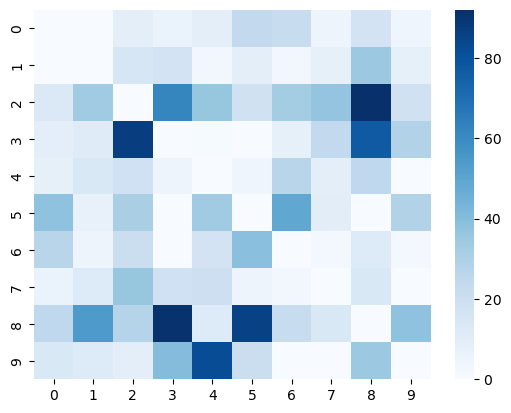

In [18]:
import seaborn as sns
# Function to replace values greater than 100 with 0
def replace_values(x):
    if x > 100:
        return 0
    else:
        return x

# Apply the function to each cell in the DataFrame
cm = cm.applymap(replace_values)
sns.heatmap(cm,cmap="Blues")

In [19]:
test = pd.read_csv('test.csv')

In [20]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
LogisticRegression = beta.predict(test)

In [22]:
LogisticRegression

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [23]:
# ans =pd.DataFrame({'ImageId':from 1 to sub ,'Label':sub})

In [24]:
LogisticRegression = pd.DataFrame({'ImageId': range(1, len(LogisticRegression) + 1), 'Label':  LogisticRegression })

In [25]:
LogisticRegression

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [26]:
LogisticRegression.to_csv("LogisticRegression.csv",index=False)